In [17]:
import numpy as np
import matplotlib.pyplot as plt
%run IDM_helper_functions.ipynb

import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer

from sbi.inference import MNLE
from pyro.distributions import InverseGamma
from torch.distributions import Beta, Binomial, Gamma
from sbi.utils import MultipleIndependent

from sbi.inference import MCMCPosterior, VIPosterior, RejectionPosterior
from sbi.utils.torchutils import atleast_2d

from sbi.utils import mcmc_transform
from sbi.inference.potentials.base_potential import BasePotential

In [18]:
W_pos, W_neg = 52500, 8400
B1, B2 = 0, 0
N, theta = 2000, 51450

y1, y2 = 0.2, 0.2
beta=1/24
print(energy(y1,y2))
print(dEdy1(y1, y2, W_pos, W_neg, B1, theta))
print(dEdy2(y1,y2, W_pos, W_neg, B2, theta))
print(free_energy(y1,y2,N=2000))
print(dFdy1(y1,y2, W_pos, W_neg, B1, theta, beta, N))
print(dFdy2(y1,y2, W_pos, W_neg, B2, theta, beta, N))

16716.0
32130.0
32130.0
-7303.316329833018
-1141.064666877377
-1141.064666877377


In [38]:
# Training data
num_simulations = 100000
#prior = utils.BoxUniform(low=[0,0.2,0.1,0.005], high=[0.8,0.6,0.6,0.05])
#prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.8,0.6,0.6])
#prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.8,0.6,0.6])
prior = utils.BoxUniform(low=[0.01,0.2,0.2,0.001], high=[0.4,0.6,0.8,0.05])
parameters = prior.sample((num_simulations,))
x = simul_IDM_CG_four_param(np.array(parameters))

sim0
sim1000
sim2000
sim3000
sim4000
sim5000
sim6000
sim7000
sim8000
sim9000
sim10000
sim11000
sim12000
sim13000
sim14000
sim15000
sim16000
sim17000
sim18000
sim19000
sim20000
sim21000
sim22000
sim23000
sim24000
sim25000
sim26000
sim27000
sim28000
sim29000
sim30000
sim31000
sim32000
sim33000
sim34000
sim35000
sim36000
sim37000
sim38000
sim39000
sim40000
sim41000
sim42000
sim43000
sim44000
sim45000
sim46000
sim47000
sim48000
sim49000
sim50000
sim51000
sim52000
sim53000
sim54000
sim55000
sim56000
sim57000
sim58000
sim59000
sim60000
sim61000
sim62000
sim63000
sim64000
sim65000
sim66000
sim67000
sim68000
sim69000
sim70000
sim71000
sim72000
sim73000
sim74000
sim75000
sim76000
sim77000
sim78000
sim79000
sim80000
sim81000
sim82000
sim83000
sim84000
sim85000
sim86000
sim87000
sim88000
sim89000
sim90000
sim91000
sim92000
sim93000
sim94000
sim95000
sim96000
sim97000
sim98000
sim99000


In [39]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior)
trainer = trainer.append_simulations(parameters, x)
mnle = trainer.train()

 Neural network successfully converged after 73 epochs.

In [40]:
mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")
#mcmc_parameters=dict(init_strategy="resample", num_chains=10, warmup_steps=100)
#mnle_posterior = trainer.build_posterior(mnle, prior)

## Simulate from DDM and fit from IDM from my code

In [41]:
# prior = utils.BoxUniform(low=[0.01,0.2,0.2,0.001], high=[0.4,0.6,0.8,0.05])
Vs = np.random.uniform(low=0, high=4, size=30)
As = np.random.uniform(low=0.6, high=2, size=30)
Ters = np.random.uniform(low=0.2, high=0.8, size=30)

n_trials = 300
num_samples = 100
par_fitted = np.zeros((30,4))

In [42]:
for i in range(len(Vs)):
    print(i)
    v,a,ter = Vs[i], As[i], Ters[i]
    DDM_o = simul_DDM(np.tile((Vs[i], As[i], Ters[i]), (n_trials,1)), c = 1) # simulate IDM data 0.1**0.5
    
    #prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.5,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(DDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted[i,:] = np.array(mnle_map)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
Optimization was interrupted after 712 iterations. 
12


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/wangjiashun/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_1606/3497100022.py", line 4, in <module>
    DDM_o = simul_DDM(np.tile((Vs[i], As[i], Ters[i]), (n_trials,1)), c = 1) # simulate IDM data 0.1**0.5
  File "/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_1606/2491430338.py", line 16, in simul_DDM
    dW = np.random.normal()*np.sqrt(dt)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/wangjiashun/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of t

TypeError: object of type 'NoneType' has no len()

Text(0, 0.5, 'sigma')

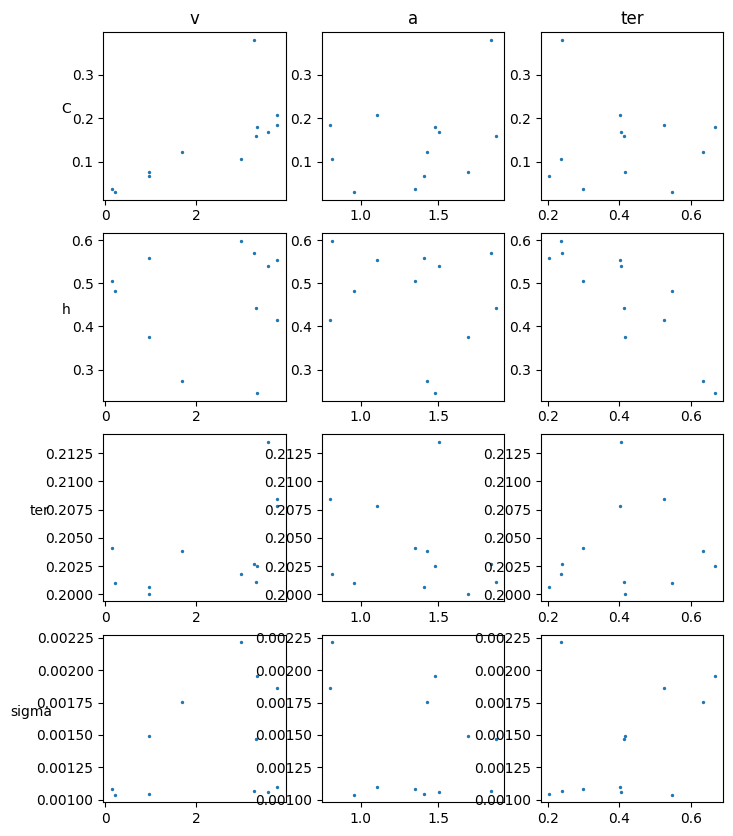

In [44]:
# prior = utils.BoxUniform(low=[0.01,0.2,0.1,0.001], high=[0.4,0.6,0.8,0.1])

sim_num = 12
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9),(ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(8,10))

ax1.scatter(Vs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Ters[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Vs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Ters[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Vs[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Ters[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax10.scatter(Vs[0:sim_num], par_fitted[0:sim_num,3], s = 2)
ax11.scatter(As[0:sim_num], par_fitted[0:sim_num,3], s = 2)
ax12.scatter(Ters[0:sim_num], par_fitted[0:sim_num,3], s = 2)

ax1.set_title("v")
ax2.set_title("a")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)
ax10.set_ylabel("sigma", rotation=0)

Text(0, 0.5, 'sigma')

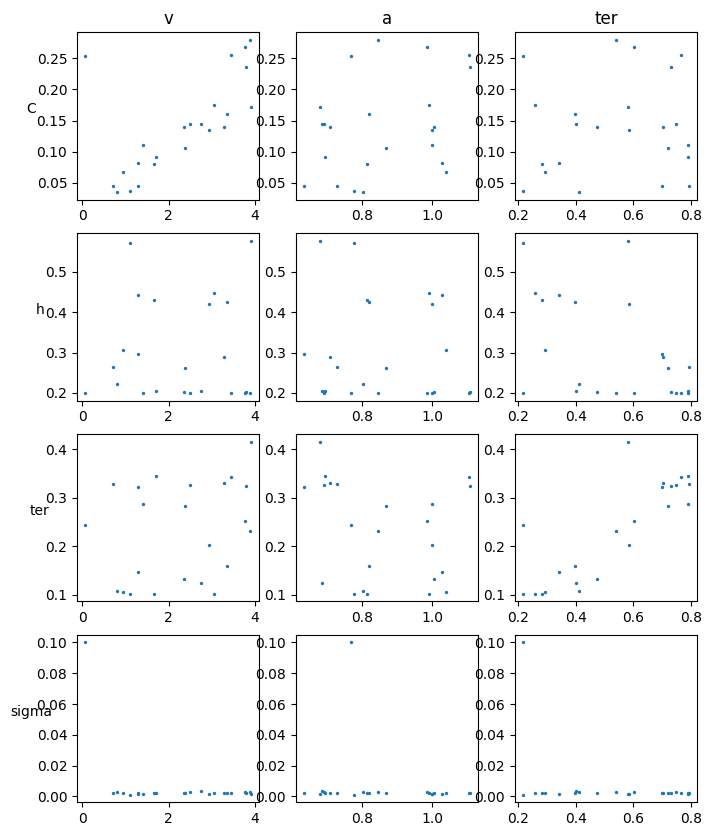

In [34]:
## sim 300
Vs = np.random.uniform(low=0, high=4, size=30)
As = np.random.uniform(low=0.6, high=1.2, size=30)
Ters = np.random.uniform(low=0.2, high=0.8, size=30)


Text(0, 0.5, 'sigma')

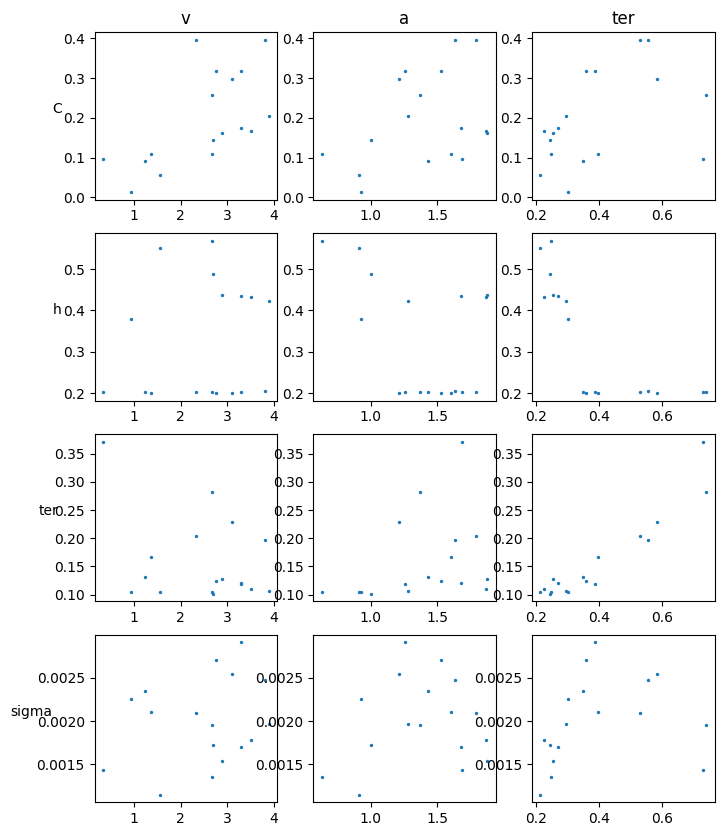

In [31]:
# 300
Vs = np.random.uniform(low=0, high=4, size=30)
As = np.random.uniform(low=0.6, high=2, size=30)
Ters = np.random.uniform(low=0.2, high=0.8, size=30)

In [11]:
np.corrcoef(As[0:sim_num], par_fitted[0:sim_num,0])

array([[1.        , 0.51806589],
       [0.51806589, 1.        ]])

Text(0, 0.5, 'ter')

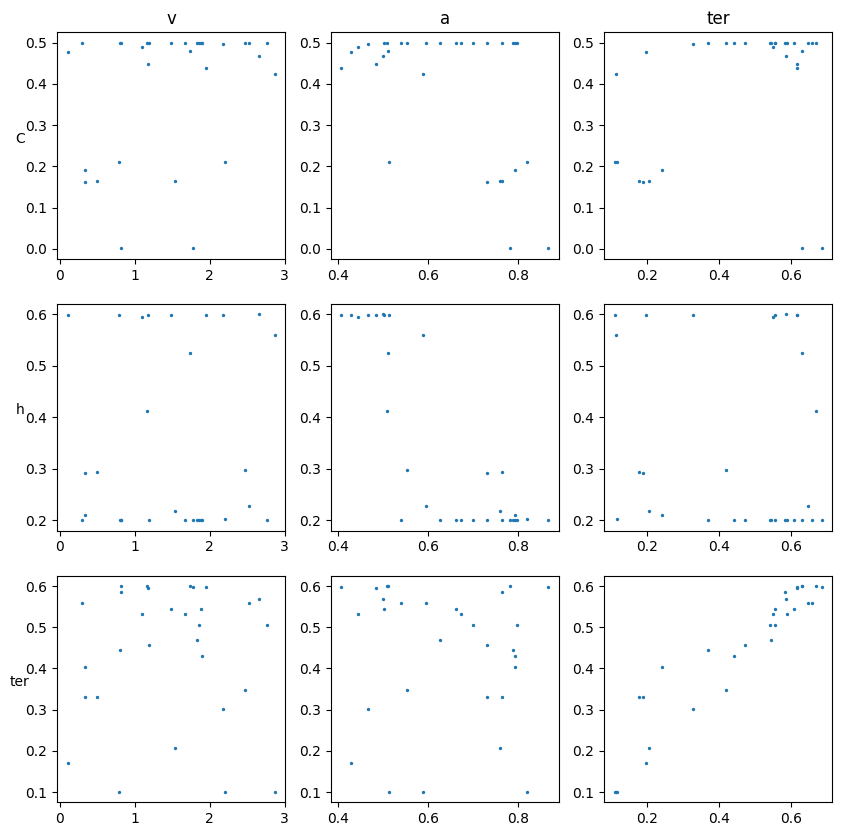

In [85]:
sim_num = 30
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Vs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Ters[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Vs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Ters[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Vs[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Ters[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("v")
ax2.set_title("a")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)

In [151]:
Vs = np.random.uniform(low=0, high=3, size=30)
As = np.random.uniform(low=0.5, high=0.9, size=30)
Ters = np.random.uniform(low=0.1, high=0.7, size=30)
cs = np.random.uniform(low=0.1, high=1, size=30)

n_trials = 150
num_samples = 100
par_fitted = np.zeros((30,4))

for i in range(len(Vs)):
    print(i)
    v,a,ter = Vs[i], As[i], Ters[i]
    DDM_o = simul_DDM(np.tile((Vs[i], As[i], Ters[i]), (n_trials,1)), c = cs[i]) # simulate IDM data
    
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    mnle_posterior.set_default_x(DDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted[i,:] = np.array(mnle_map)
    
    

0


/Users/wangjiashun/Documents/GitHub/sbi/sbi/utils/sbiutils.py:321: UserWarning: An x with a batch size of 150 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  respect to entire batch, i.e,. p(theta | X)."""


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


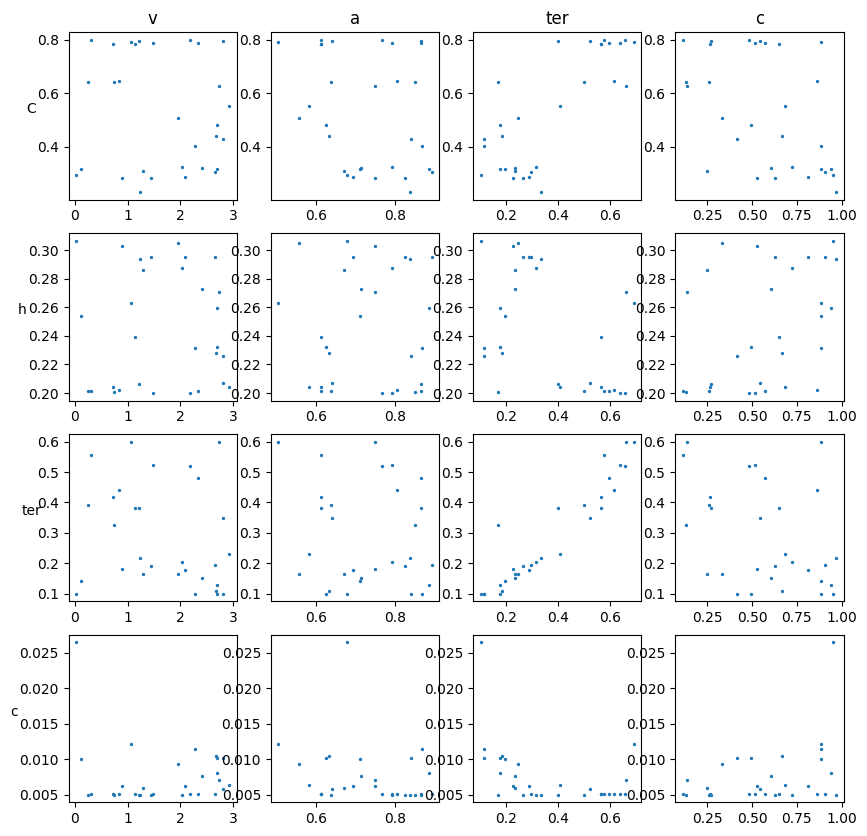

In [155]:
sim_fit_plot_4(Vs, As, Ters, cs, par_fitted, sim_num = 30)

In [ ]:
Vs = np.random.uniform(low=0, high=4, size=30)
As = np.random.uniform(low=0.6, high=2, size=30)
Ters = np.random.uniform(low=0.2, high=0.8, size=30)

n_trials = 300
num_samples = 100
par_fitted = np.zeros((30,3))


In [ ]:
for i in range(len(Vs)):
    print(i)
    v,a,ter = Vs[i], As[i], Ters[i]
    DDM_o = simul_DDM(np.tile((Vs[i], As[i], Ters[i]), (n_trials,1)), c = 1) # simulate IDM data
    print(DDM_o[0:5,:])
    #prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.6,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(DDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted[i,:] = np.array(mnle_map)
    
    

In [ ]:
## replicate again changing the priors for h and Ter 
sim_fit_plot(Vs, As, Ters, par_fitted, sim_num = 19)

Text(0, 0.5, 'ter')

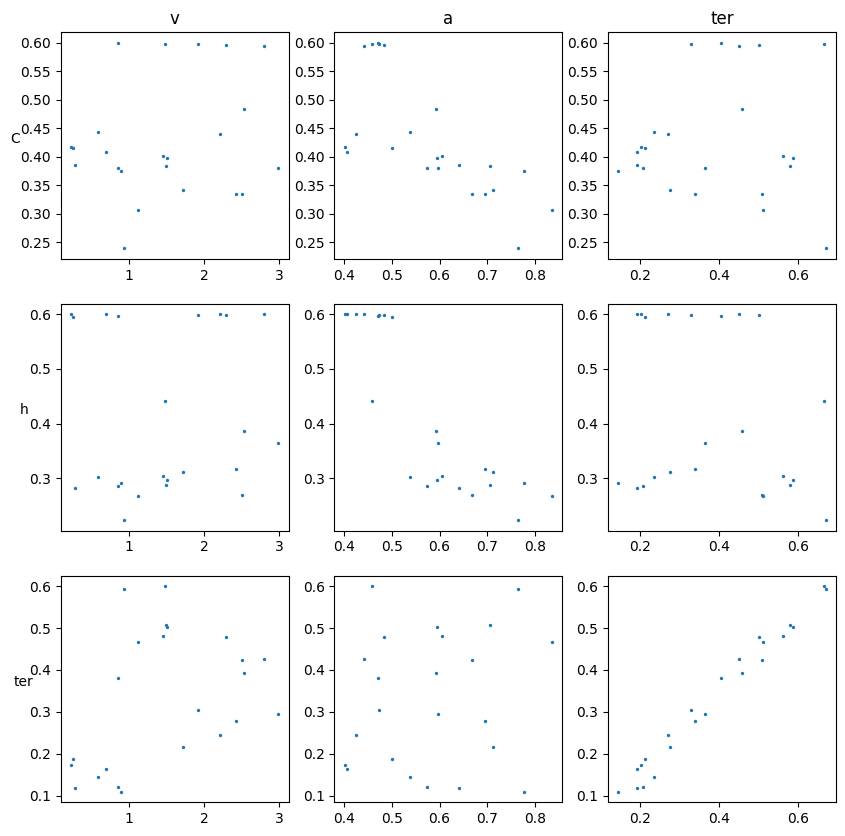

In [107]:
## original
sim_num = 23
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Vs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Ters[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Vs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Ters[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Vs[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Ters[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("v")
ax2.set_title("a")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)

## Simulate from DDM and fit from IDM from pyDDM

In [25]:
Vs = np.random.uniform(low=0, high=3, size=30)
As = np.random.uniform(low=0.4, high=0.9, size=30)
Ters = np.random.uniform(low=0.1, high=0.7, size=30)

n_trials = 10
num_samples = 100
par_fitted = np.zeros((30,3))

In [ ]:
for i in range(len(Vs)):
    print(i)
    v,a,ter = Vs[i], As[i], Ters[i]
    DDM_o = simul_DDM_mult_trial(v, a, ter, n_trials) # simulate DDM data
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(DDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted[i,:] = np.array(mnle_map)

In [ ]:
sim_num = 15
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Vs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Ters[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Vs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Ters[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Vs[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Ters[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("v")
ax2.set_title("a")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)

In [34]:
par_fitted_IDM[0:sim_num,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Simulate from IDM and fit from IDM

In [37]:
Cs = np.random.uniform(low=0, high=0.4, size=30)
hs = np.random.uniform(low=0.2, high=0.6, size=30)
ters = np.random.uniform(low=0.1, high=0.6, size=30)
n_trials = 1000
num_samples = 100
par_fitted_IDM = np.zeros((30,3))


In [ ]:
#plt.scatter(0,0)
#plt.xlim(0,0.5)
#plt.ylim(0,0.5)
#plt.show()

for i in range(len(Vs)):
    print(i)
    IDM_o = simul_IDM_mult_trial(np.tile((Cs[i], hs[i], ters[i]), (n_trials,1))) # simulate IDM data
    
    prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.4,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    #mnle_samples = mnle_posterior.sample((num_samples,), x=DDM_o) # fit with IDM
    
    mnle_posterior.set_default_x(IDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted_IDM[i,:] = np.array(mnle_map)
    #plt.scatter(Cs[i],mnle_map[0])
    #plt.show()

Text(0, 0.5, 'ter')

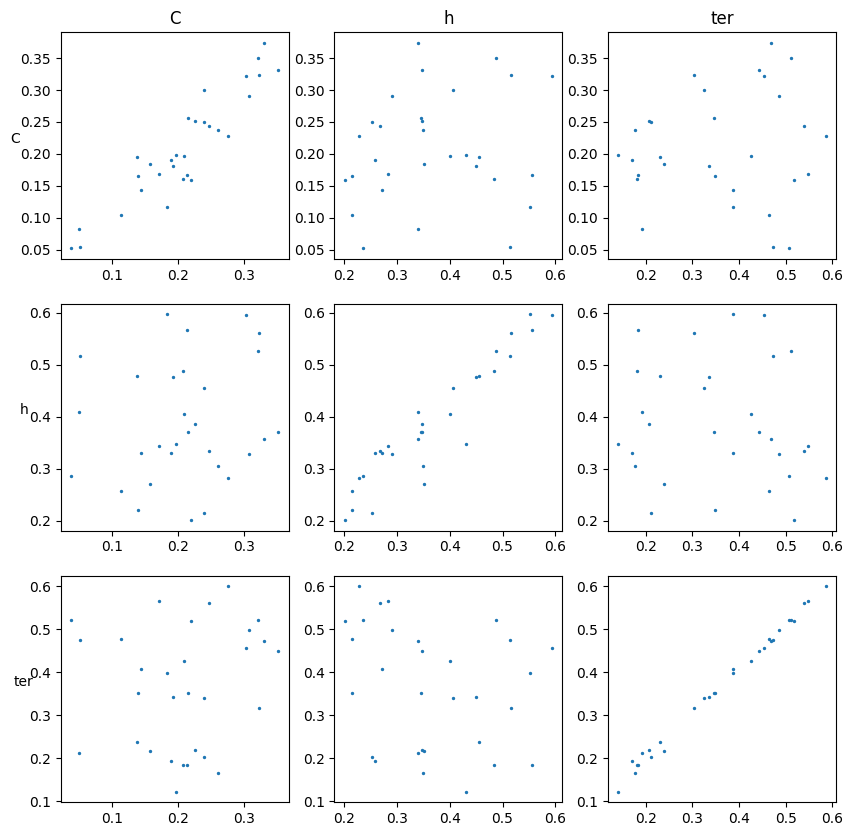

In [47]:

sim_num = 30
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)
ax2.scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)
ax3.scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)
ax4.scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)
ax5.scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)
ax6.scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)
ax7.scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)
ax8.scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)
ax9.scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)

ax1.set_title("C")
ax2.set_title("h")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)

In [ ]:
i = 0
np.repeat(np.array((Vs[i], As[i], Ters[i])), num_trials, 1)

In [ ]:
#### try to build diffusion model by myself!!!!!
#### try to do parameter recovery for diffusion models!!!!!